In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [19]:
data = {
    'FY': ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    'Return on Common Equity': [-18.69, -35.92, -84.60, -22.91, -43.59, -21.31, -14.94, 4.78, 21.04, 33.53],
    'Return on Assets': [-4.19, -7.13, -12.79, -4.39, -7.64, -3.34, -2.69, 1.67, 9.66, 17.38],
    'Return on Capital': [-5.64, -9.78, -22.60, -7.66, -13.35, -3.15, -1.14, 4.76, 15.43, 27.71],
    'Return on Invested Capital': [-7.05, -9.63, -21.36, -8.47, -12.75, -3.31, -1.45, 4.93, 14.97, 27.12],
    'Gross Margin': [22.66, 27.57, 22.82, 22.85, 18.90, 18.83, 16.56, 21.02, 25.28, 25.60],
    'EBITDA Margin': [2.23, 1.41, -7.27, 4.00, 0.03, 7.05, 10.22, 15.12, 18.69, 22.34],
    'Operating Margin': [-3.04, -5.84, -17.71, -9.53, -13.88, -1.81, -0.28, 6.32, 12.12, 16.76],
    'Incremental Operating Margin': [20.81, None, None, 1.67, None, 12.82, 10.24, 29.65, 20.32, 25.81],
    'Pretax Margin': [-3.55, -8.90, -21.64, -10.66, -18.79, -4.68, -2.71, 3.66, 11.78, 16.84],
    'Income before XO Margin': [-3.68, -9.19, -21.96, -11.04, -19.05, -4.95, -3.15, 2.73, 10.49, 15.45],
    'Net Income Margin': [-3.68, -9.19, -21.96, -9.64, -16.68, -4.55, -3.51, 2.29, 10.25, 15.41],
    'Net Income to Common Margin': [-3.68, -9.19, -21.96, -9.64, -16.68, -4.55, -3.51, 2.19, 10.24, 15.41],
    'Effective Tax Rate': [None, None, None, None, None, None, None, 25.30, 11.02, 8.25],
    'Dvd Payout Ratio': [None, None, None, None, None, None, None, 0.00, 0.00, 0.00],
    'Sustainable Growth Rate': [None, None, None, None, None, None, None, 4.78, 21.04, 33.53]
}

df = pd.DataFrame(data)
df.set_index('FY', inplace=True)


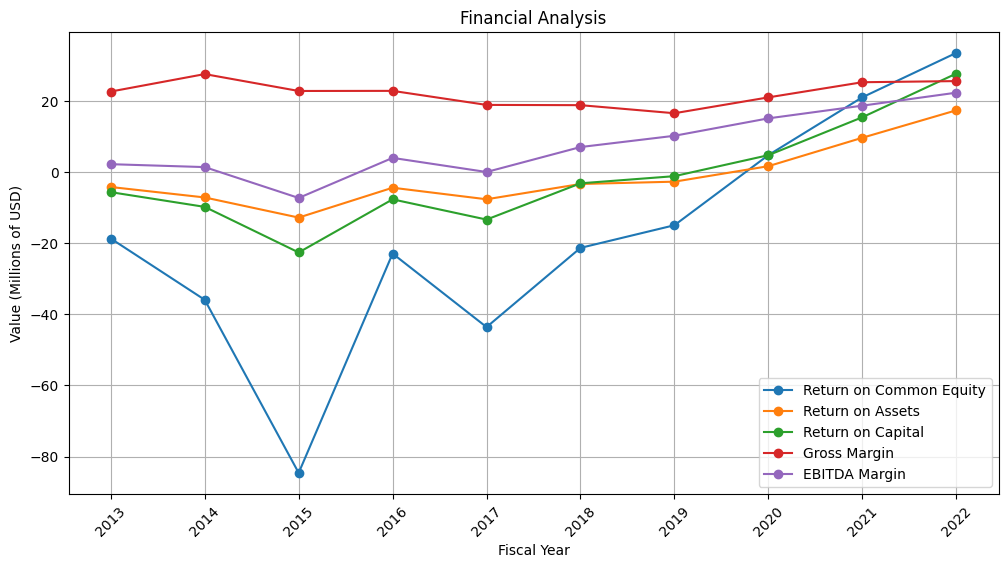

In [20]:
selected_columns = ['Return on Common Equity', 'Return on Assets', 'Return on Capital', 'Gross Margin', 'EBITDA Margin']

plt.figure(figsize=(12, 6))
for col in selected_columns:
    plt.plot(df.index, df[col], marker='o', label=col)

plt.title('Financial Analysis')
plt.xlabel('Fiscal Year')
plt.ylabel('Value (Millions of USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [21]:
# Calculate basic statistics
summary_stats = df.describe()
print(summary_stats)


       Return on Common Equity  Return on Assets  Return on Capital  \
count                10.000000         10.000000          10.000000   
mean                -18.261000         -1.346000          -1.542000   
std                  33.589264          8.869813          14.495774   
min                 -84.600000        -12.790000         -22.600000   
25%                 -32.667500         -6.445000          -9.250000   
50%                 -20.000000         -3.765000          -4.395000   
75%                  -0.150000          0.580000           3.285000   
max                  33.530000         17.380000          27.710000   

       Return on Invested Capital  Gross Margin  EBITDA Margin  \
count                   10.000000     10.000000      10.000000   
mean                    -1.700000     22.209000       7.382000   
std                     14.146265      3.437536       9.201646   
min                    -21.360000     16.560000      -7.270000   
25%                     -9.340

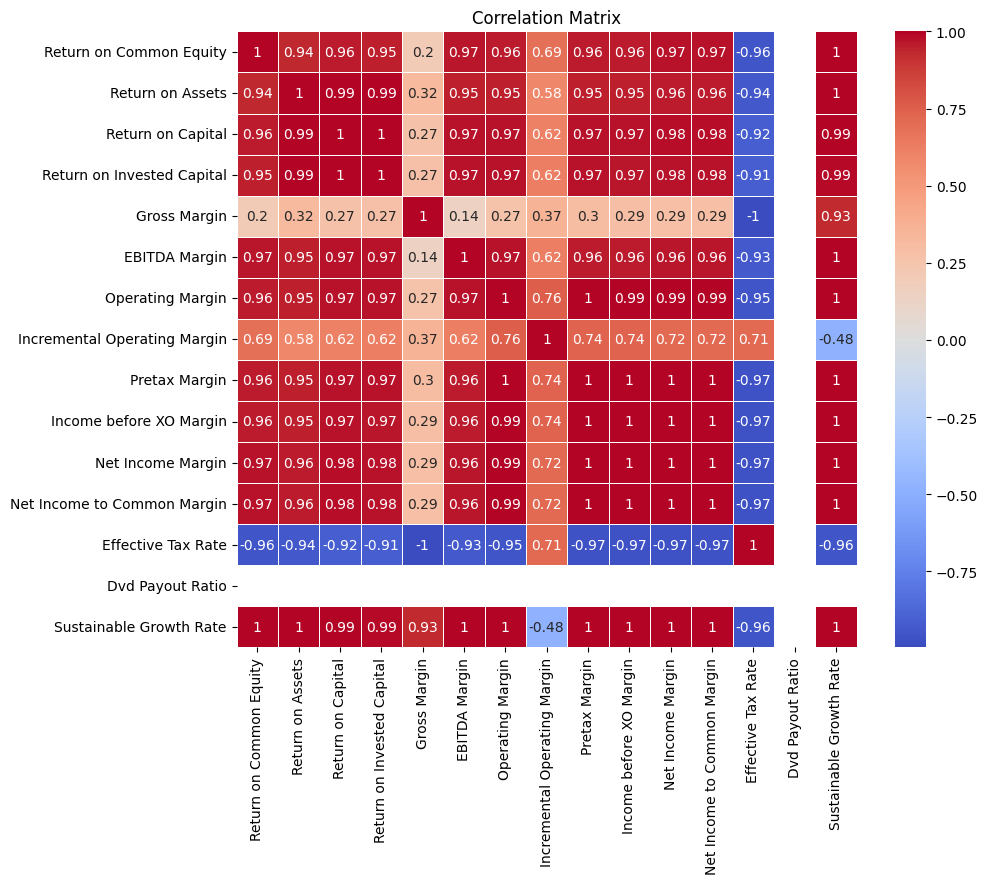

In [22]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


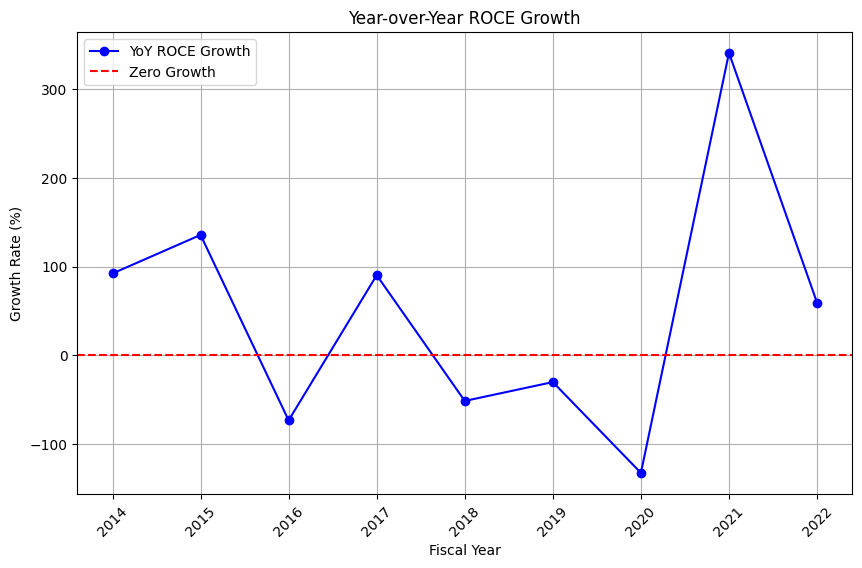

In [36]:
# Calculate year-over-year growth rates for Return on Common Equity
df['YoY ROCE Growth'] = df['Return on Common Equity'].pct_change() * 100

# Plot YoY growth
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['YoY ROCE Growth'], marker='o', label='YoY ROCE Growth', color='b')
plt.axhline(0, color='r', linestyle='--', label='Zero Growth')
plt.title('Year-over-Year ROCE Growth')
plt.xlabel('Fiscal Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


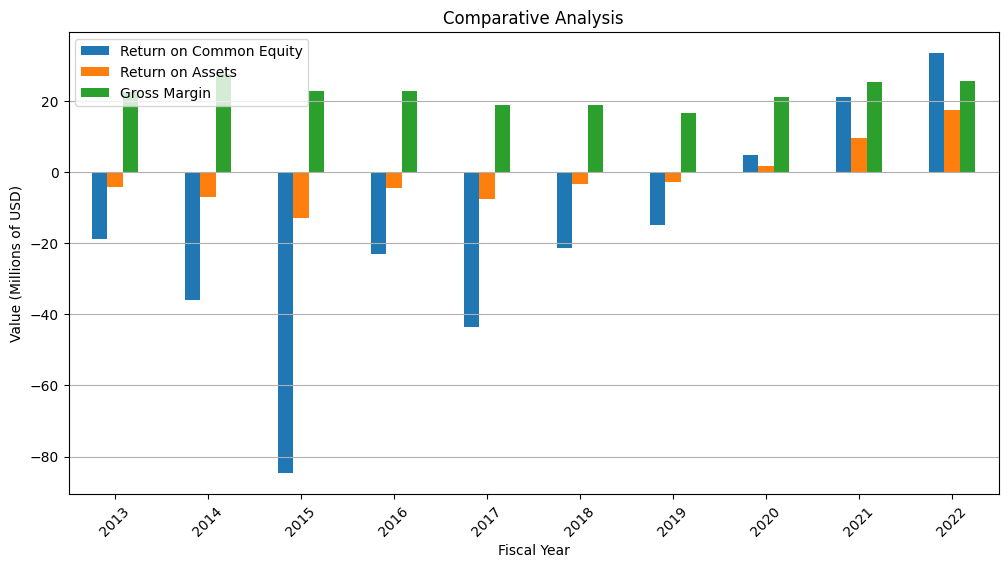

In [38]:
# Select specific metrics for comparison
comparison_columns = ['Return on Common Equity', 'Return on Assets', 'Gross Margin']

# Create a bar chart for the selected metrics
df[comparison_columns].plot(kind='bar', figsize=(12, 6))
plt.title('Comparative Analysis')
plt.xlabel('Fiscal Year')
plt.ylabel('Value (Millions of USD)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


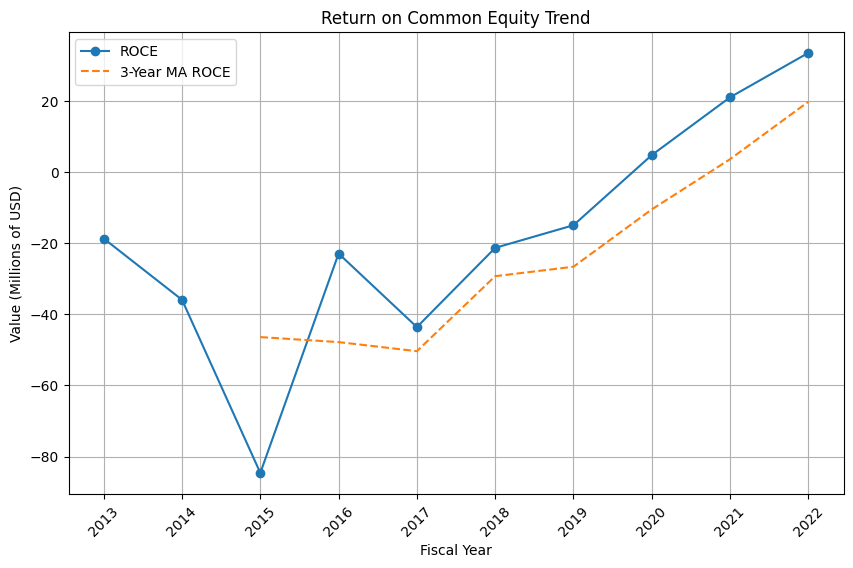

In [41]:
# Calculate 3-year moving average for Return on Common Equity
df['3-Year MA ROCE'] = df['Return on Common Equity'].rolling(window=3).mean()

# Plot the trend using the moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Return on Common Equity'], label='ROCE', marker='o')
plt.plot(df.index, df['3-Year MA ROCE'], label='3-Year MA ROCE', linestyle='--')
plt.title('Return on Common Equity Trend')
plt.xlabel('Fiscal Year')
plt.ylabel('Value (Millions of USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
